In [10]:
import sys
sys.path.insert(0,'/home/richard.brito/pSEOBNRv4HM/opt/lib64/python2.7/site-packages/')

In [11]:
%matplotlib inline
import lalsimulation,lal
#help(lal)
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import h5py

In [12]:
#this hdf5 file contains samples from a high temperature chain, so effectively the samples are drawn from the prior
f=h5py.File('samples.hdf5.07')
list(f['lalinference/lalinference_mcmc/'].keys())

[u'chain_07']

In [13]:
len(f['lalinference/lalinference_mcmc/chain_07']['logdistance'])

455

## check priors on the masses

/cvmfs/ligo-containers.opensciencegrid.org/lscsoft/conda/latest/envs/ligo-py27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


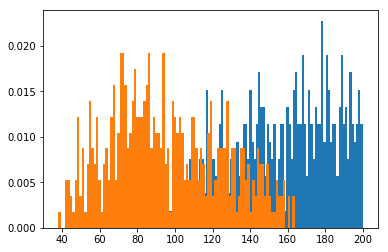

In [5]:
mchirp      = f['lalinference/lalinference_mcmc/chain_07']['chirpmass']
q           = f['lalinference/lalinference_mcmc/chain_07']['q']
m1          = (mchirp*pow(1 + q,1./5.))/pow(q,3./5.)
m2          = mchirp*pow(q,2./5.)*pow(1 + q,1./5.)
    
plt.hist(m1,bins=100,normed=1)
plt.hist(m2,bins=100,normed=1)

#plt.xlim([20,40])
plt.show()

## check priors on domega and dtau

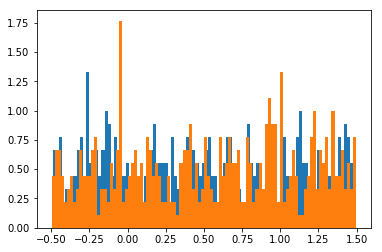

In [6]:
plt.hist(f['lalinference/lalinference_mcmc/chain_07']['domega220'],bins=100,normed=1)
plt.hist(f['lalinference/lalinference_mcmc/chain_07']['dtau220'],bins=100,normed=1)

#plt.xlim([20,40])
plt.show()

## Check lenght of pSEOB using samples above. note that I am using ampO=1, not sure if I should be using ampO=0 instead

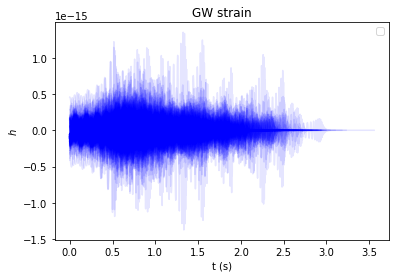

In [7]:
phi_c       = 0.
inclination = 0.
flow=11.
ampO=1.
f_start22   = flow * 2./(ampO+2) #Frequency of the 22 mode at which the signal starts
deltaT      = 1./(1024.)

for i in range(0,len(f['lalinference/lalinference_mcmc/chain_07']['chirpmass'])):

    # Define binary parameters
    mchirp          = f['lalinference/lalinference_mcmc/chain_07']['chirpmass'][i]*lal.MSUN_SI
    q          = f['lalinference/lalinference_mcmc/chain_07']['q'][i]

    m1          = (mchirp*pow(1 + q,1./5.))/pow(q,3./5.)
    m2          = mchirp*pow(q,2./5.)*pow(1 + q,1./5.)
 #   print(m1/(lal.MSUN_SI),m2/(lal.MSUN_SI))
    spin1_z     = f['lalinference/lalinference_mcmc/chain_07']['a_spin1'][i]
    spin2_z     = f['lalinference/lalinference_mcmc/chain_07']['a_spin2'][i]

    distance    = np.exp(f['lalinference/lalinference_mcmc/chain_07']['logdistance'][i])*lal.PC_SI

    # Create the dictionary containing TGR deviations and add a deviation domega220=1.0
    TGRparams_dict = lal.CreateDict()
    lalsimulation.SimInspiralWaveformParamsInsertDOmega220(TGRparams_dict, f['lalinference/lalinference_mcmc/chain_07']['domega220'][i])
    lalsimulation.SimInspiralWaveformParamsInsertDTau220(TGRparams_dict,  f['lalinference/lalinference_mcmc/chain_07']['dtau220'][i])

    # Generate the waveform
    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)

    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)

    plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=0.1)
    #plt.plot(time_array, -np.imag(h), color='b', label='h_x')
    plt.xlabel('t')
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain')
    plt.legend()
    #plt.xlim([3.6,4])
    #plt.ylim([-1e-14,1e-14])

plt.legend()
#plt.xlim([0,8])
plt.show()

## Check lenght for SEOB (i.e. GR waveform) using samples above.

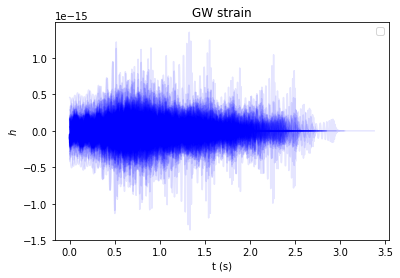

In [14]:
phi_c       = 0.
inclination = 0.
flow=11.
ampO=1.
f_start22   = flow * 2./(ampO+2) #Frequency of the 22 mode at which the signal starts
deltaT      = 1./(1024.)

for i in range(0,len(f['lalinference/lalinference_mcmc/chain_07']['chirpmass'])):

    # Define binary parameters
    mchirp          = f['lalinference/lalinference_mcmc/chain_07']['chirpmass'][i]*lal.MSUN_SI
    q          = f['lalinference/lalinference_mcmc/chain_07']['q'][i]

    m1          = (mchirp*pow(1 + q,1./5.))/pow(q,3./5.)
    m2          = mchirp*pow(q,2./5.)*pow(1 + q,1./5.)
 #   print(m1/(lal.MSUN_SI),m2/(lal.MSUN_SI))
    spin1_z     = f['lalinference/lalinference_mcmc/chain_07']['a_spin1'][i]
    spin2_z     = f['lalinference/lalinference_mcmc/chain_07']['a_spin2'][i]

    distance    = np.exp(f['lalinference/lalinference_mcmc/chain_07']['logdistance'][i])*lal.PC_SI

    # Create the dictionary containing TGR deviations and add a deviation domega220=1.0
    TGRparams_dict = lal.CreateDict()

    # Generate the waveform
    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,
                                                    0., 0., spin1_z, #Aligned-spin wf
                                                    0., 0., spin2_z, #Aligned-spin wf
                                                    distance,
                                                    inclination,
                                                    phi_c,
                                                    0., 0., 0., #longAscNodes, eccentricity, meanPerAno
                                                    deltaT,
                                                    f_start22, #flow
                                                    11., #fref
                                                    TGRparams_dict,
                                                    lalsimulation.SEOBNRv4HM)

    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)

    #plt.subplot(223)
    plt.plot(time_array,  np.real(h), color='b', linestyle='-',alpha=0.1)
    #plt.plot(time_array, -np.imag(h), color='b', label='h_x')
    plt.xlabel('t')
    plt.ylabel('$h$')
    plt.xlabel('t (s)')
    plt.title('GW strain')
    plt.legend()
    #plt.xlim([3.6,4])
    #plt.ylim([-1e-14,1e-14])

plt.legend()
#plt.xlim([0,8])
plt.show()